/home/lpo/.sage/local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/lpo/.sage/local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  950
Model:                 ARIMA(2, 0, 2)   Log Likelihood               -1392.791
Date:                Thu, 01 May 2025   AIC                           2797.582
Time:                        15:18:49   BIC                           2826.721
Sample:                             0   HQIC                          2808.685
                                - 950                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.5551      9.471      1.959      0.050      -0.008      37.118
ar.L1          0.2128      0.396      0.537      0.591      -0.564       0.989
ar.L2          0.7831      0.395      1.981      0.0

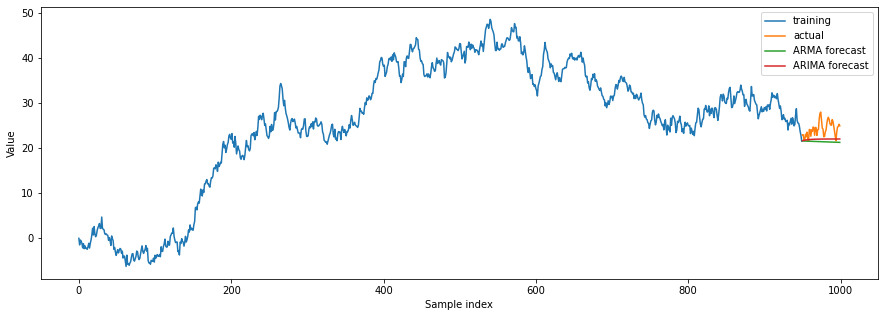

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf

def forecast_accuracy(forecast, actual, name):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.transpose([forecast, actual]), axis=1)
    maxs = np.amax(np.transpose([forecast, actual]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(forecast)[1]                      # ACF1
    return({'name': name, 'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})


N = 1000
np.random.seed(22)
samples = pd.Series(np.cumsum(np.random.normal(0, 1, N)))
train = samples[:int(samples.size * 0.95)]
test = samples[int(samples.size * 0.95):]

arma = ARIMA(train, order=(2, 0, 2)).fit()
arma_forecast = pd.Series(arma.forecast(test.size), index=test.index)

arima = ARIMA(train, order=(2, 1, 2)).fit()
arima_forecast = pd.Series(arima.forecast(test.size), index=test.index)

print(arma.summary())
print(arima.summary())

fa = pd.DataFrame({k: [v] for k, v in forecast_accuracy(arma_forecast, test.values, "ARMA(2,2)").items()})
fa.loc[len(fa)] = forecast_accuracy(arima_forecast, test.values, "ARIMA(2,1,2)")
print(fa)

plt.figure(figsize=(15,5))
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(arma_forecast, label='ARMA forecast')
plt.plot(arima_forecast, label='ARIMA forecast')
plt.xlabel("Sample index")
plt.ylabel("Value")
plt.legend()
plt.show()
